In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from math import exp

In [2]:
url = "iris.txt"
names = ["x1","x2","x3","x4","class"]
data = pandas.read_csv(url, names=names)

In [3]:
arr_iris = np.zeros((100,4))
arr_class = np.zeros(100)
tetha = np.zeros((101,5))
tetha[0] = ([0.4,0.1,0.2,0.6,0.9])
temp_tetha = [0.4,0.1,0.2,0.6,0.9]
deltatetha = np.zeros((100,5))
arr_prediction = np.zeros(100)
arr_error = np.zeros(100)
arr_hfuction = np.zeros(100)
arr_sigmoid = np.zeros(100)
class SGD:
    ROWS_DATA = 100
    def save_data(self):
        for i in range (100):
            for j in range (5):
                if j==4:
                    if data.iloc[i][4] == 'Iris-setosa':
                        arr_class[i] = 1
                    else:
                        arr_class[i] = 0
                else:
                    arr_iris[i][j] = data.iloc[i][j]
           
    def h_function(self,i):
        
        return arr_iris[i][0]*temp_tetha[0]+arr_iris[i][1]*temp_tetha[1]+arr_iris[i][2]*temp_tetha[2]+arr_iris[i][3]*temp_tetha[3]+temp_tetha[4]
    
    def sigmoid(self,i):
        arr_sigmoid[i] = 1/(1+exp(-self.h_function(i)))
    
    def prediction(self,i):
        if arr_sigmoid[i]<0.5:
            arr_prediction[i] = 0
        else:
            arr_prediction[i] = 1
    
    def error(self,i):
        arr_error[i] = (arr_class[i]-arr_sigmoid[i])*(arr_class[i]-arr_sigmoid[i])
        
    def deltatetha(self,i):
        for j in range (5):
            if j == 4:
                deltatetha[i][j] = 2*(arr_sigmoid[i]-arr_class[i])*(1-arr_sigmoid[i])*arr_sigmoid[i]*1
            else:
                deltatetha[i][j] = 2*(arr_sigmoid[i]-arr_class[i])*(1-arr_sigmoid[i])*arr_sigmoid[i]*arr_iris[i][j]
                
    def tetha_baru(self,i):
        global temp_tetha
        #print(i, temp_tetha, arr_error[i])
        for j in range (5):
            tetha[i+1][j] = temp_tetha[j]-alpha*deltatetha[i][j]
        temp_tetha = tetha[i+1]
        
            
    def main(self):
        self.save_data()
        x = np.zeros(EPOCH)
        for j in range (EPOCH):
            for i in range (100):
                self.h_function(i)
                self.prediction(i)
                self.sigmoid(i)
                self.error(i)
                self.deltatetha(i)
                self.tetha_baru(i)
                x[j] = x[j] + arr_error[i]
        plt.plot(x)
        plt.show()

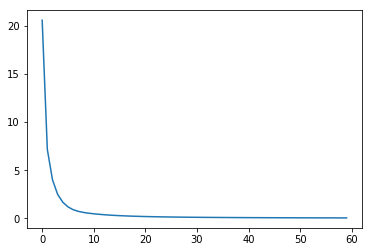

In [4]:
EPOCH = 60
alpha = 0.1
a = SGD()
a.main()